<a href="https://colab.research.google.com/github/qmdmlot/CPE-031-Visualizations-and-Data-Analysis/blob/main/Hands_On_Activity_9___Exploring_Data_Visually_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hands-On Activity 9 | Exploring Data Visually**





---



Name : Mark David M. Loterte<br>
Course Code and Title : CPE 031 - CPE21S2<br>
Date Submitted : October 16, 2025<br>
Instructor : Maria Rizette Sayo


---



**1. Objectives:**

This activity aims to demonstrate students’ ability to visually explore and analyze data using Python. Students will learn how to summarize and visualize categorical, quantitative, time-series, and geospatial data for exploratory data analysis (EDA).

**2. Intended Learning Outcomes (ILOs):**

By the end of this module the students should be able to demonstrate:
1. Analyze various visualization techniques to determine how data representation methods influence understanding, perception, and decision-making.

2. Evaluate existing visualizations in terms of accuracy, clarity, aesthetics, and accessibility, providing justified recommendations for improvement.

3. Create effective, insightful, and user-centered visualizations by integrating appropriate design principles, data encoding techniques, and visualization tools.

**3. Discussions:**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics and gain insights before formal modeling. Visual exploration helps identify trends, relationships, and data quality issues.

Key Components:

Univariate Analysis:
Analyzing one variable at a time (e.g., histograms, bar charts).

Bivariate Analysis:
Exploring relationships between two variables (e.g., scatterplots, crosstabs).

Missing Data Analysis:
Identifying and handling missing or null values.

Time-Series Visualization:
Displaying data across time to reveal trends or seasonality.

Geospatial Visualization:
Mapping data to geographical regions to identify spatial patterns.

EDA is both an art and science combining statistical summaries with visual intuition.

**4. Procedures:**

**Color and Perception**

Section 1: Organizing and Exploring Data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Product,Region,Sales,Profit
0,Juice,North,120,30
1,Smoothie,South,150,45
2,Juice,East,90,20
3,Smoothie,West,110,25
4,Juice,North,130,35
5,Smoothie,East,170,50


Task 1: Analyzing Variables One at a Time

/tmp/ipython-input-2975764973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=df, palette="Set2")


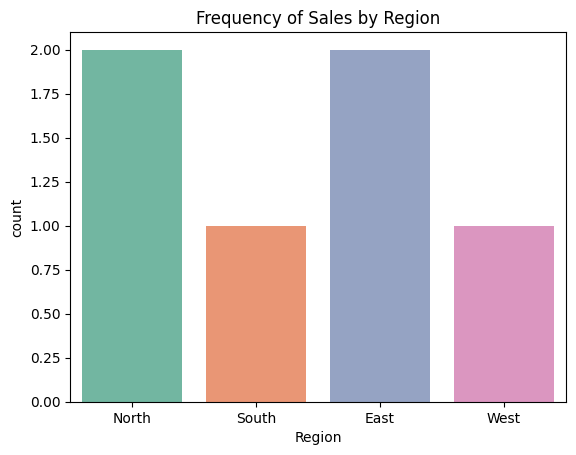

In [39]:
#Categorical Variable
# Countplot for categorical variable
sns.countplot(x="Region", data=df, palette="Set2")
plt.title("Frequency of Sales by Region")
plt.show()


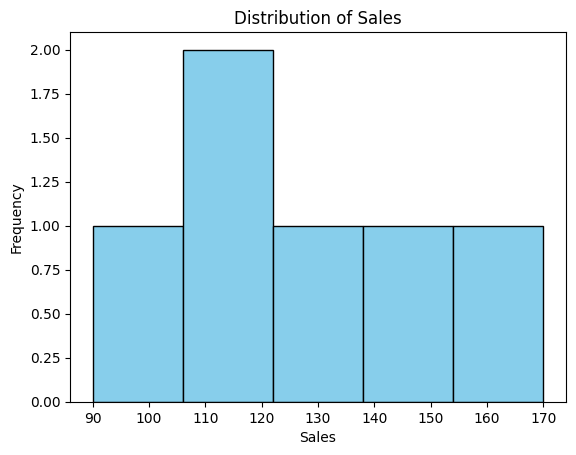

In [40]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Sales"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

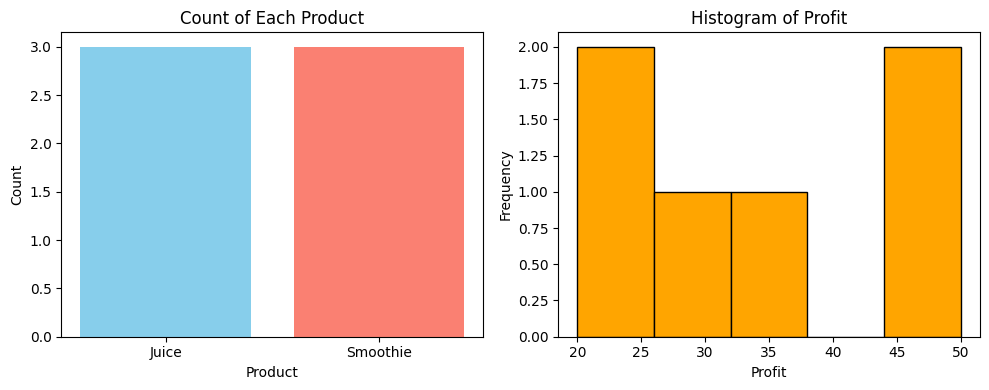

In [41]:
product_counts = df["Product"].value_counts()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(product_counts.index, product_counts.values, color=["skyblue", "salmon"])
plt.title("Count of Each Product")
plt.xlabel("Product")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(df["Profit"], bins=5, color="orange", edgecolor="black")
plt.title("Histogram of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

1. Both Products are sold equally often
2. Strong profitability is present

Section 2: Relationships Between Variables

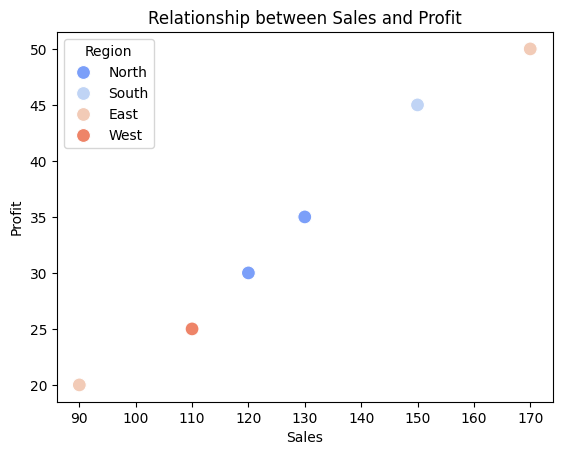

In [42]:
# Scatterplot: Sales vs Profit
sns.scatterplot(x="Sales", y="Profit", hue="Region", data=df, palette="coolwarm", s=100)
plt.title("Relationship between Sales and Profit")
plt.show()

In [43]:
# Crosstabulation example
pd.crosstab(df["Region"], df["Product"], values=df["Sales"], aggfunc="mean").fillna(0)


Product,Juice,Smoothie
Region,,
East,90.0,170.0
North,125.0,0.0
South,0.0,150.0
West,0.0,110.0


Task: <br>
Interpret whether higher sales also mean higher profit. <br>
Which region seems to perform best?

The amount of profit is proportional to the number of sales.
East performed the best due to having the most sales.

Section 3: Analysis of Missing Data

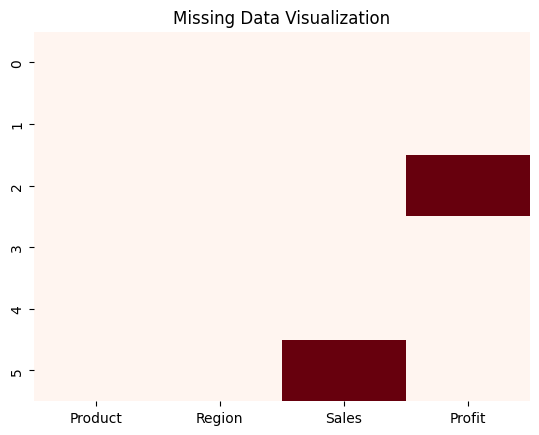

,0
Product,0
Region,0
Sales,1
Profit,1


In [44]:
# Introduce missing data
df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Sales"] = np.nan

# Visualize missing data
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
df_missing.isnull().sum()


Task: <br>
Describe what you observe in the missing data visualization. <br>
Which variables need attention before analysis?

The colored map shows the gaps of data. The list shows how many gaps there are per column. Since Sales and Profit have a value higher than 0, they need attention first before analysis.

Section 4: Visualizing Time-Series Data

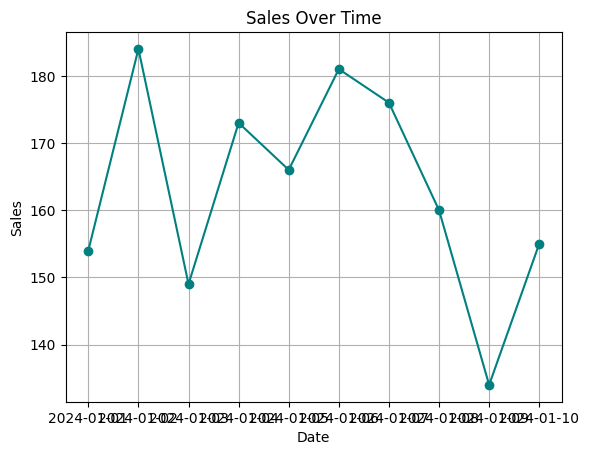

In [45]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Line chart for time-series
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

Task: <br>
Add a moving average line (rolling mean) to smooth fluctuations. <br>
Hint: Use ts_df["Sales"].rolling(window=3).mean().

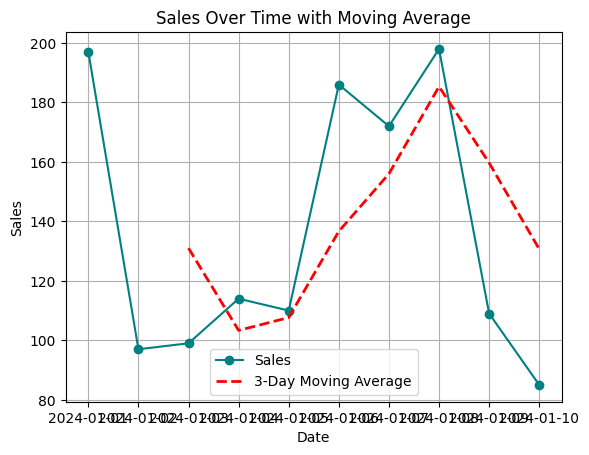

In [46]:
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

ts_df["Moving_Avg"] = ts_df["Sales"].rolling(window=3).mean()

plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal", label="Sales")
plt.plot(ts_df["Date"], ts_df["Moving_Avg"], color="red", linestyle="--", linewidth=2, label="3-Day Moving Average")

plt.title("Sales Over Time with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

Section 5: Visualizing Geospatial Data

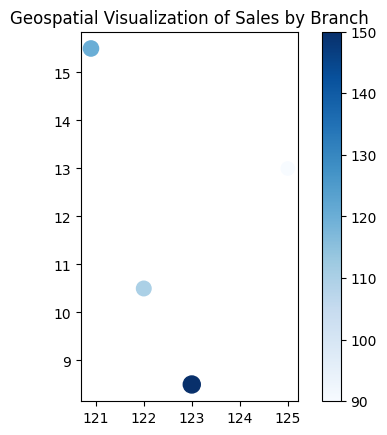

In [47]:
import geopandas as gpd
from shapely.geometry import Point

# Sample coordinates (latitude, longitude)
coords = {
    "Branch": ["North", "South", "East", "West"],
    "Latitude": [15.5, 8.5, 13.0, 10.5],
    "Longitude": [120.9, 123.0, 125.0, 122.0],
    "Sales": [120, 150, 90, 110]
}

geo_df = pd.DataFrame(coords)
geo_df["geometry"] = [Point(xy) for xy in zip(geo_df.Longitude, geo_df.Latitude)]
gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")

# Plot simple map (Philippines outline optional if available)
gdf.plot(column="Sales", cmap="Blues", legend=True, markersize=geo_df["Sales"])
plt.title("Geospatial Visualization of Sales by Branch")
plt.show()

Task: <br>
Interpret which branch has the highest sales geographically. <br>
How can such visualization help in business decision-making?

The southern branch has the highest sales geographically.
These maps can help businesses identify which geographical points are most profitable so that they can capitalize these opportunities.

**5. Supplementary Activity**

Create your own mini exploratory analysis:

1. Choose a dataset (e.g., from Kaggle, or a CSV file you have).

2. Perform:

*   Univariate analysis (1 categorical + 1 quantitative)
*   Bivariate analysis (scatterplot or crosstab)
*   Missing data visualization
*   Time-series or geospatial visualization (choose one)
3. Summarize your key insights using visual interpretation.

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd

df_accidents = pd.read_csv('/content/drive/MyDrive/CPE 031 - LOTERTE/RoadAccidents.csv')
display(df_accidents.head())

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


/tmp/ipython-input-985460007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Cause category", data=df_accidents, order=df_accidents["Cause category"].value_counts().index, palette="viridis")


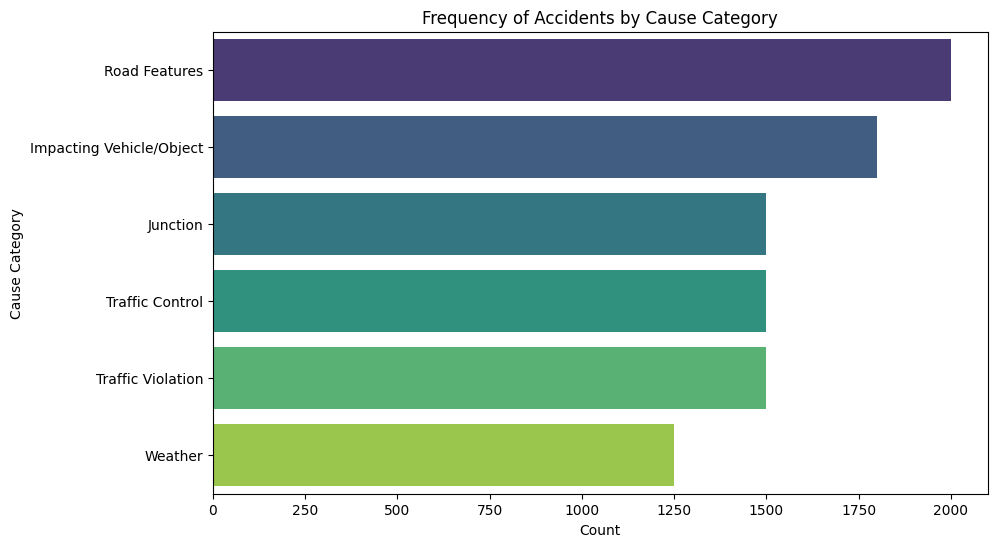

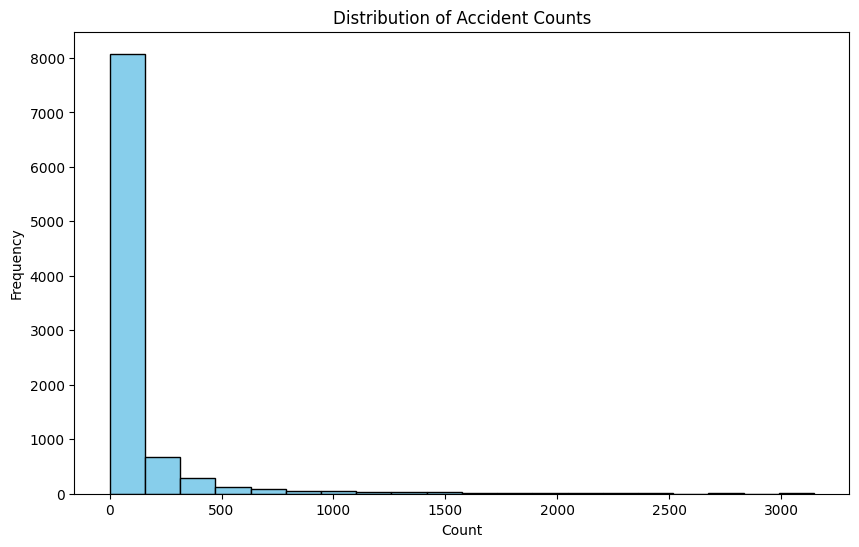


Crosstabulation of Cause Category and Outcome of Incident:


Outcome of Incident,Greviously Injured,Minor Injury,Persons Killed,Total Injured,Total number of Accidents
Cause category,,,,,
Impacting Vehicle/Object,450,450,450,0,450
Junction,300,300,300,300,300
Road Features,400,400,400,400,400
Traffic Control,300,300,300,300,300
Traffic Violation,300,300,300,300,300
Weather,250,250,250,250,250



Missing Data Visualization:


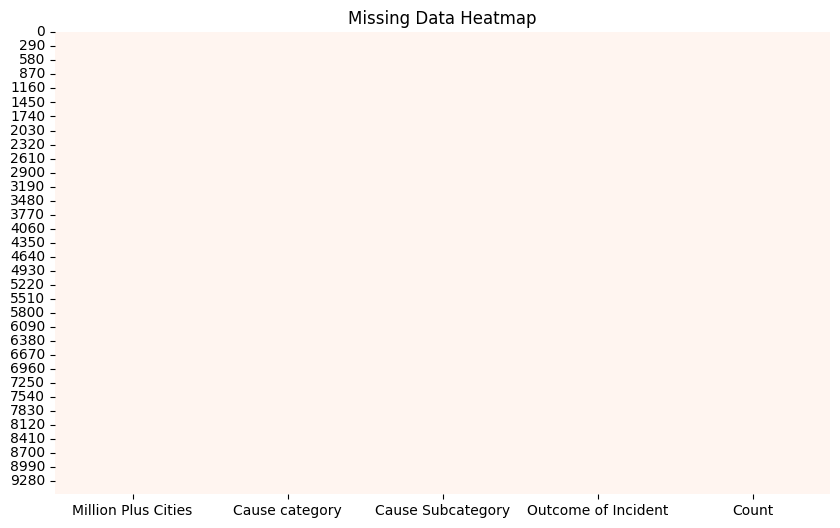


Missing data summary:


,0
Million Plus Cities,0
Cause category,0
Cause Subcategory,0
Outcome of Incident,0
Count,3


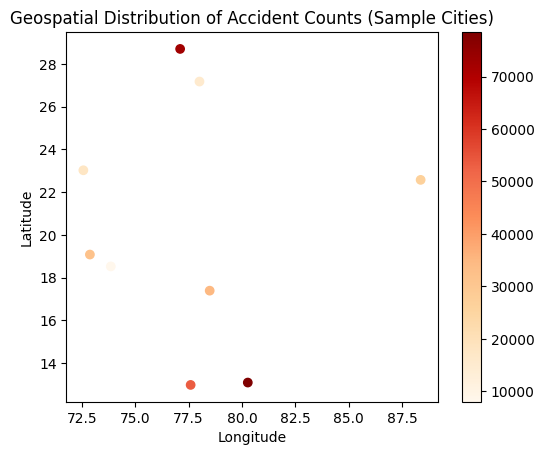

In [50]:
# Supplementary Activity

# 1. Univariate Analysis

# Categorical Variable: 'Cause category'
plt.figure(figsize=(10, 6))
sns.countplot(y="Cause category", data=df_accidents, order=df_accidents["Cause category"].value_counts().index, palette="viridis")
plt.title("Frequency of Accidents by Cause Category")
plt.xlabel("Count")
plt.ylabel("Cause Category")
plt.show()

# Quantitative Variable: 'Count'
plt.figure(figsize=(10, 6))
plt.hist(df_accidents["Count"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Accident Counts")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

# 2. Bivariate Analysis

# Crosstabulation: Cause category vs Outcome of Incident
print("\nCrosstabulation of Cause Category and Outcome of Incident:")
display(pd.crosstab(df_accidents["Cause category"], df_accidents["Outcome of Incident"]))

# 3. Missing Data Visualization
print("\nMissing Data Visualization:")
plt.figure(figsize=(10, 6))
sns.heatmap(df_accidents.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Heatmap")
plt.show()

print("\nMissing data summary:")
display(df_accidents.isnull().sum())

# 4. Geospatial Visualization
import geopandas as gpd
from shapely.geometry import Point

# Sample coordinates for a few cities from the list since there is no coordinates indicated
sample_coords = {
    "Million Plus Cities": ["Agra", "Ahmedabad", "Bengaluru", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Mumbai", "Pune"],
    "Latitude": [27.1767, 23.0225, 12.9716, 13.0827, 28.7041, 17.3850, 22.5726, 19.0760, 18.5204],
    "Longitude": [78.0080, 72.5714, 77.5946, 80.2707, 77.1025, 78.4867, 88.3639, 72.8777, 73.8567]
}

sample_geo_df = pd.DataFrame(sample_coords)

df_accidents_agg = df_accidents.groupby("Million Plus Cities")["Count"].sum().reset_index()

geo_df_merged = pd.merge(df_accidents_agg, sample_geo_df, on="Million Plus Cities")

geo_df_merged["geometry"] = [Point(xy) for xy in zip(geo_df_merged.Longitude, geo_df_merged.Latitude)]
gdf_accidents = gpd.GeoDataFrame(geo_df_merged, geometry="geometry")

gdf_accidents.plot(column="Count", cmap="OrRd", legend=True)
plt.title("Geospatial Distribution of Accident Counts (Sample Cities)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

- The countplot shows the distribution of accident causes, highlighting which categories contribute most to road accidents in the analyzed cities.<br>
- The histogram illustrates the frequency of different accident count values, indicating the typical number of accidents and any outliers. <br>
- The table reveals the relationship between the cause of an accident and its outcome (e.g., minor injury, persons killed), showing which causes are associated with more severe outcomes.<br>
- The heatmap visually represents where data is missing in the dataset, quickly showing which columns have incomplete information.<br>
- The map visualizes the total accident counts across a sample of cities, suggesting which urban areas have higher accident frequencies.

**6. Conclusion/Learnings/Analysis:**

I observed patterns in sales and profit, identified missing data points, and visualized time-series trends and geospatial distributions to gain insights from the datasets. These visualizations allow me to highlight key characteristics and relationships within the data, providing a foundation for analysis and decision making.
